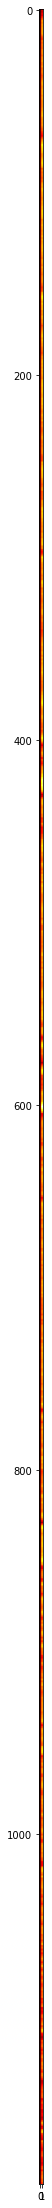

In [48]:
import argparse
import logging
from lzma import PRESET_DEFAULT
import os
import sys
from xml.etree.ElementPath import prepare_descendant

import numpy as np
import torch
import torch.nn as nn
from torch import optim
from tqdm import tqdm

from model import AttU_Net
from model import U_Net
from model import NestedUNet
from utils.loss_function import *
from utils.accuracy import *
from utils.dataset import *
from utils.array import *
from scipy import interpolate

from torch.utils.tensorboard import SummaryWriter
from utils.dataset import BasicDataset
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
import random
import cv2
from PIL import Image, ImageFilter
from collections import OrderedDict

from pathlib import Path
import skimage
from skimage.morphology import thin, skeletonize

matplotlib.rcParams['figure.figsize'] = [40, 40]

# Define your source files
raw_folder = "/mnt/external.data/TowbinLab/spsalmon/bacteria_database/new_growth_curve_test/analysis/ch1_2/"

im = skio.imread("/mnt/external.data/TowbinLab/plenart/20220704_CREST_10x_red_bacteria_and_wbt23_plus_N2_and_standartOP50/with_fluo/analysis/ch1_3/Time00126_Point0030_Channel546 nm,477 nm,DIA_Seq21157.tiff")
plt.imshow(im[0,:, :], cmap="hot")
plt.show()

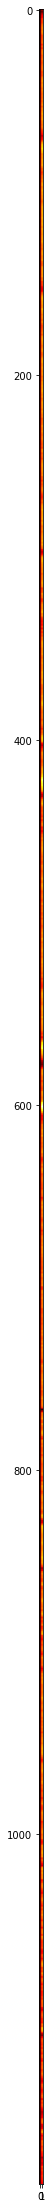

In [49]:
plt.imshow(im[1,:, :], cmap="hot")
plt.show()

In [50]:
tl = im[1,:, :]
bact = im[0,:, :]

# nbins = np.max(tl)
# tl = (skimage.exposure.equalize_adapthist(tl, nbins= nbins))
tl = (tl/np.max(tl))
tl = skimage.exposure.equalize_hist(tl)

bact = (bact/np.max(bact))
bact = skimage.exposure.equalize_hist(bact)

new_im = np.zeros((im.shape[1], im.shape[2], 2))
new_im[:, :, 0] = bact
new_im[:, :, 1] = tl

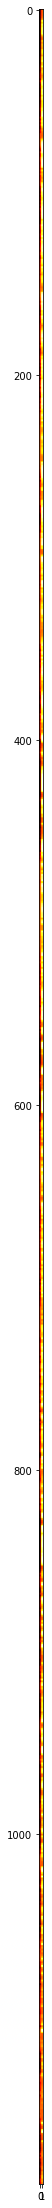

In [51]:
plt.imshow(new_im[:, :, 0], cmap="hot")
plt.show()

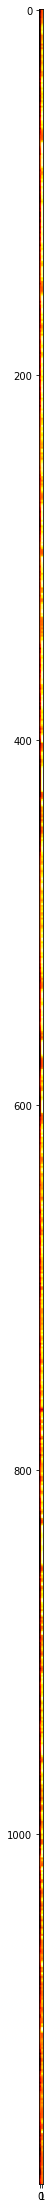

In [52]:
plt.imshow(new_im[:, :, 1], cmap="hot")
plt.show()